In [1]:
import pickle
import matplotlib.pyplot as plt
from ipywidgets import interactive

In [2]:
with open("./dataset/Signal_Train.pkl", 'rb') as f:
    signal = pickle.load(f)

with open("./dataset/Target_Train.pkl", 'rb') as f:
    label = pickle.load(f)

label = label.Target.astype(int).to_list()

C:\Users\user\AppData\Local\Temp\ipykernel_3444\2508163960.py:2: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  signal = pickle.load(f)
C:\Users\user\AppData\Local\Temp\ipykernel_3444\2508163960.py:5: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functio

In [4]:
print(signal[0].head(5))

print("\n", label[:5])

       Lead1      Lead2      Lead3        aVR        aVL       aVF  \
0  18.900854 -19.399054 -46.598190  19.347176  65.897385  6.394074   
1  14.076315 -20.791866 -24.208839  24.568062  70.376495  6.585491   
2  13.087292 -22.954784 -21.199226  24.776451  71.735535  6.129030   
3  13.919298 -23.644964 -21.407021  23.742867  75.164124  6.370142   
4  17.331091 -22.538895 -22.707726  23.462364  72.931244  0.456210   

           V1         V2          V3         V4         V5         V6  
0  108.389366  51.596687   88.800201 -91.155838 -11.720039 -23.726326  
1  108.966011  53.048538   85.196983 -93.485893 -14.775888 -16.611637  
2  104.848824  54.431282   88.966637 -90.965057 -17.680458 -22.826237  
3  104.377251  55.714981   97.729156 -91.986969 -14.924976 -22.747812  
4  105.671104  54.762238  101.831642 -91.483223 -14.277052 -21.467125  

 [0, 0, 1, 1, 0]


# Check only one data

Label = 0


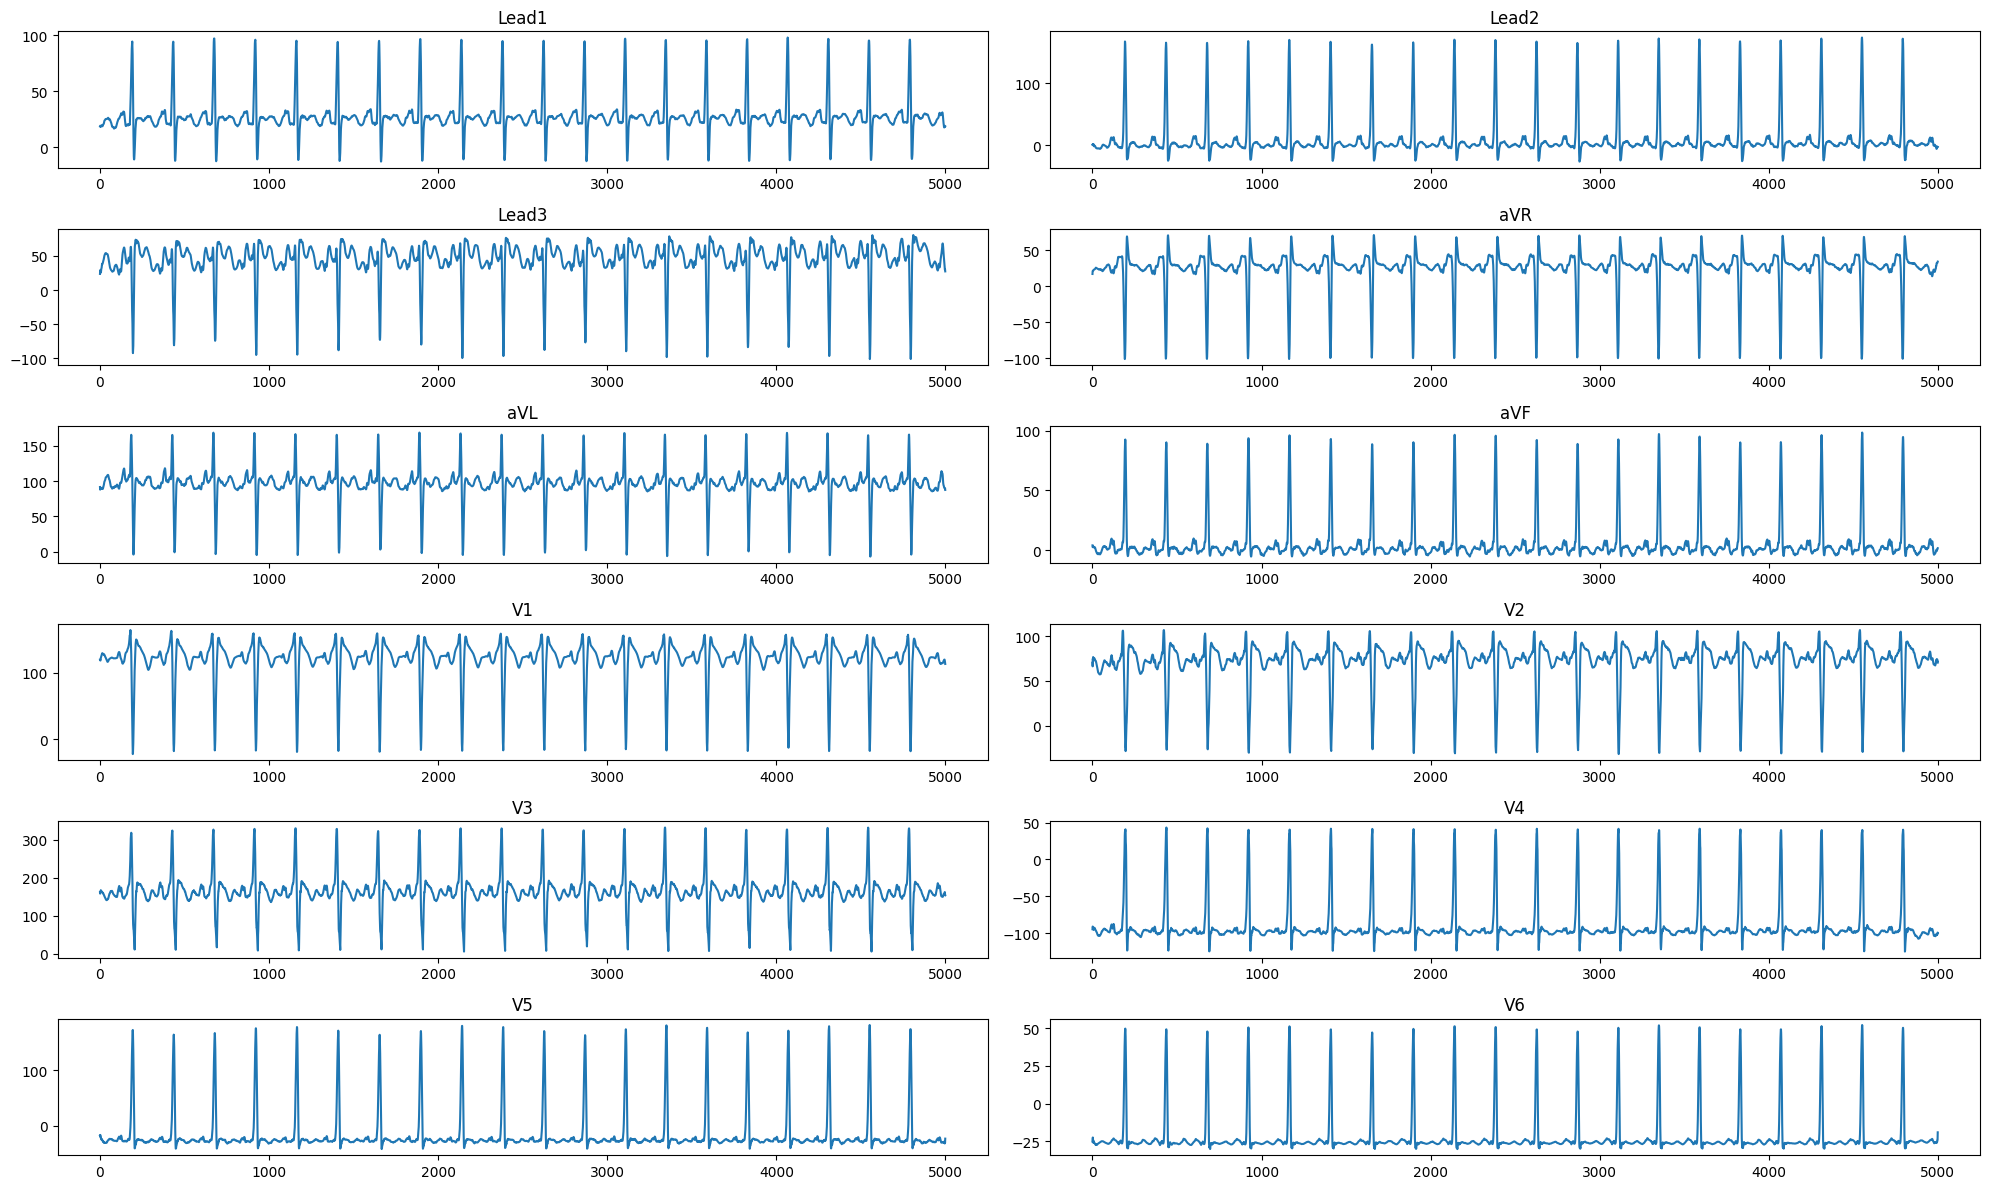

In [7]:
idx = 1599

signal_columns = signal[idx].columns.to_list()

print(f"Label = {label[idx]}")

plt.figure(figsize=(20,12))

for i in range(12):
    plt.subplot(6, 2, i+1)
    plt.title(f"{signal_columns[i]}")
    plt.plot(signal[idx][signal_columns[i]])

plt.tight_layout()
plt.show()

# Check all data

In [4]:
## Data 전체 확인

def show_signal(index=0):
    signal_columns = signal[index].columns.to_list()
    print(f"Label = {label[index]}")

    fig, axes = plt.subplots(6, 2, figsize=(20, 11))

    for row in range(6):
        for col in range(2):
            i = row * 2 + col
            ax = axes[row][col]

            ax.plot(signal[index][signal_columns[i]])
            ax.set(title=f"{signal_columns[i]}")

    plt.tight_layout()
    plt.show()

interactive_plot = interactive(show_signal, index=(0, len(signal), 1))
display(interactive_plot)

interactive(children=(IntSlider(value=0, description='index', max=2400), Output()), _dom_classes=('widget-inte…

# Save plot

In [4]:
from tqdm import tqdm

idx = 800

for index in tqdm(range(idx, 1600, 1)):
    signal_columns = signal[index].columns.to_list()

    plt.figure(figsize=(20,10), dpi=100)

    plt.suptitle(f"Index:{index} / Label:{label[index]}", fontsize=16, color='red')

    for i in range(12):
        plt.subplot(6, 2, i+1)
        plt.title(f"{signal_columns[i]}")
        plt.plot(signal[index][signal_columns[i]])

    plt.tight_layout()
    plt.savefig(f"./plots/plot_{index}.png")

    plt.cla()
    plt.clf()
    plt.close('all')

  0%|          | 0/659 [00:00<?, ?it/s]

100%|██████████| 659/659 [06:15<00:00,  1.76it/s]
